# PERFIL DOS CLIENTES DA FEDERAÇÃO DAS INDÚSTRIAS DE SC: UMA TAREFA DE CLUSTERIZAÇÃO

Deise Ferreira de Souza

Pós-graduação Lato Sensu em Ciência de Dados e Big Data

Pontifícia Universidade Católica De Minas Gerais

Objetivos

O objetivo deste estudo é por meio do uso de algoritmos de Machine Learning clusterizar os clientes das principais casas da FIESC, obter mais domínio sobre o perfil dos mesmos, contribuindo desta forma, para a definição de estratégias mais assertivas e eficazes de comunicação e relacionamento com os clientes.


In [2]:
# Carregar bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pca import pca
from gower import gower_matrix
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes

In [3]:
#leitura da base de dados
dataframe_fiesc = pd.read_excel("base_prototypes.xlsx")

In [4]:
#excluindo o cnpj
dataframe_fiesc = dataframe_fiesc.drop(['cnpj'], axis=1)

# 1- Limpeza dos dados e Análise exploratória

In [5]:
# Conferir os tipos de dados
dataframe_fiesc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21719 entries, 0 to 21718
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   produto      21719 non-null  object
 1   porte        21719 non-null  object
 2   setor        21719 non-null  object
 3   faturamento  21719 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 678.8+ KB


In [5]:
#análise das colunas
for col in dataframe_fiesc.columns:
  print("Nome da coluna:", col)
  print("Lista de valores únicos:", dataframe_fiesc[col].unique())
  print("Total de valores únicos:", dataframe_fiesc[col].value_counts())
  print("Total de valores únicos:", dataframe_fiesc[col].nunique())
  print("média:", dataframe_fiesc['faturamento'].mean())
  if dataframe_fiesc[col].isnull().any():
    null_total = dataframe_fiesc[col].isnull().sum()
    total = len(dataframe_fiesc[col])
    porcent_null = (null_total/total)*100
    print(f"Tem {null_total} valores NULL; Correspondem a {porcent_null:.2f}% do total de valores dessa coluna")
  else:
    print("Não Tem NULL")
  print('-'*100)

Nome da coluna: produto
Lista de valores únicos: ['IEL' 'Educação' 'Tecnologia' 'Ensino Superior' 'Qualificação'
 'Ensino Técnico' 'SEGURANÇA E SAÚDE NO TRABALHO' 'Saúde Assistencial'
 'PROMOÇÃO DA SAÚDE' 'Ensino básico']
Total de valores únicos: produto
SEGURANÇA E SAÚDE NO TRABALHO    5200
Saúde Assistencial               4952
Tecnologia                       4264
Qualificação                     2740
IEL                              1487
PROMOÇÃO DA SAÚDE                1452
Ensino Técnico                    561
Ensino Superior                   468
Ensino básico                     372
Educação                          223
Name: count, dtype: int64
Total de valores únicos: 10
média: 10830.092867995763
Não Tem NULL
----------------------------------------------------------------------------------------------------
Nome da coluna: porte
Lista de valores únicos: ['Micro' 'Média' 'Pequena' 'Grande']
Total de valores únicos: porte
Pequena    8238
Micro      6858
Média      4678
Grande  

C:\Users\DEISE\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


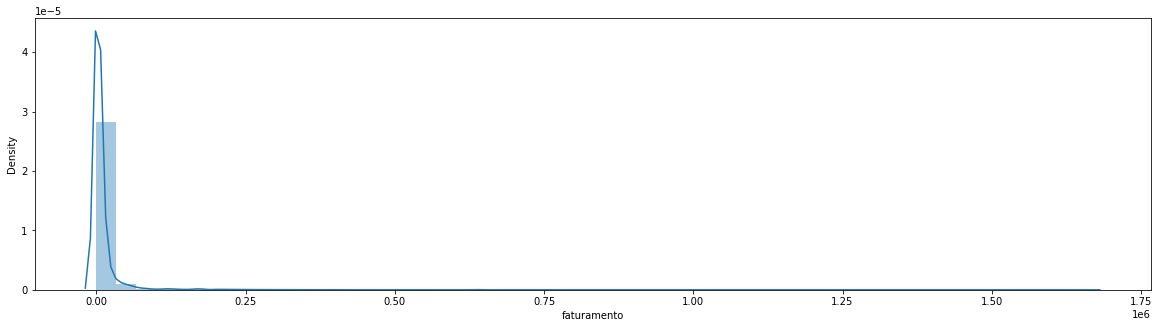

In [6]:
#distribuição do faturamento
fig, ax = plt.subplots(figsize=(20,5))
sns.distplot(dataframe_fiesc['faturamento'])
#plt.title('Distribuição do faturamento', fontsize=14, fontweight='bold')
plt.show()

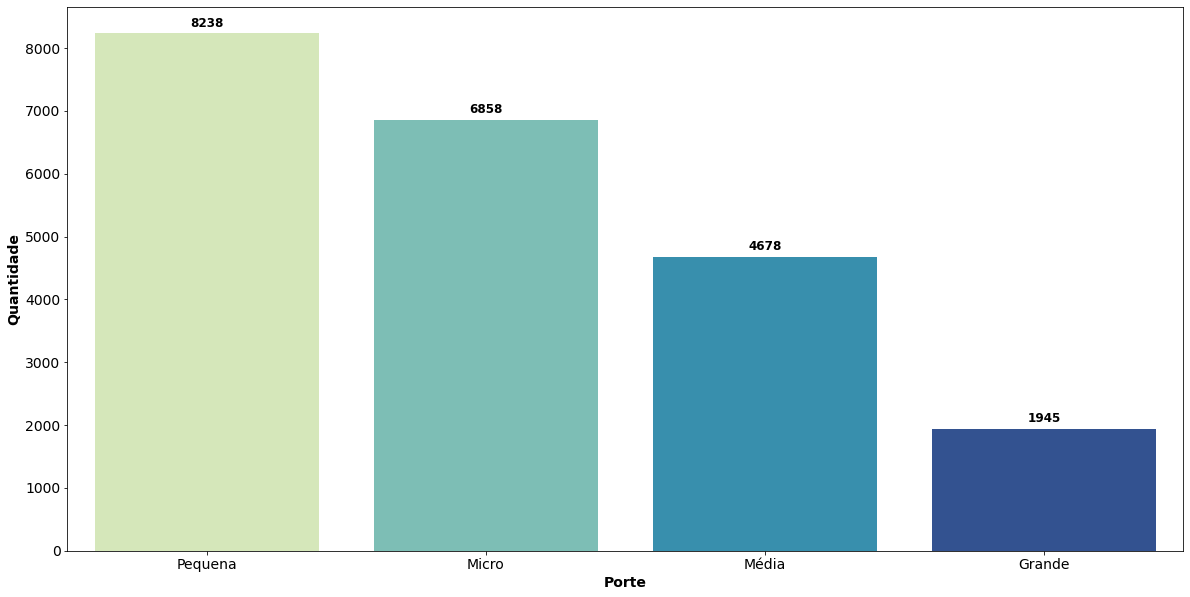

In [19]:
#volume por porte
fig, ax = plt.subplots(figsize=(20, 10))

# Contagem dos valores e ordem decrescente
order = dataframe_fiesc['porte'].value_counts().index

# Plotando o gráfico
sns.countplot(data=dataframe_fiesc, x='porte', palette='YlGnBu', order=order)

# Aumentando a fonte dos rótulos e eixos
ax.set_xlabel('Porte', fontsize=14, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=14)  

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, fontweight='bold')

plt.show()


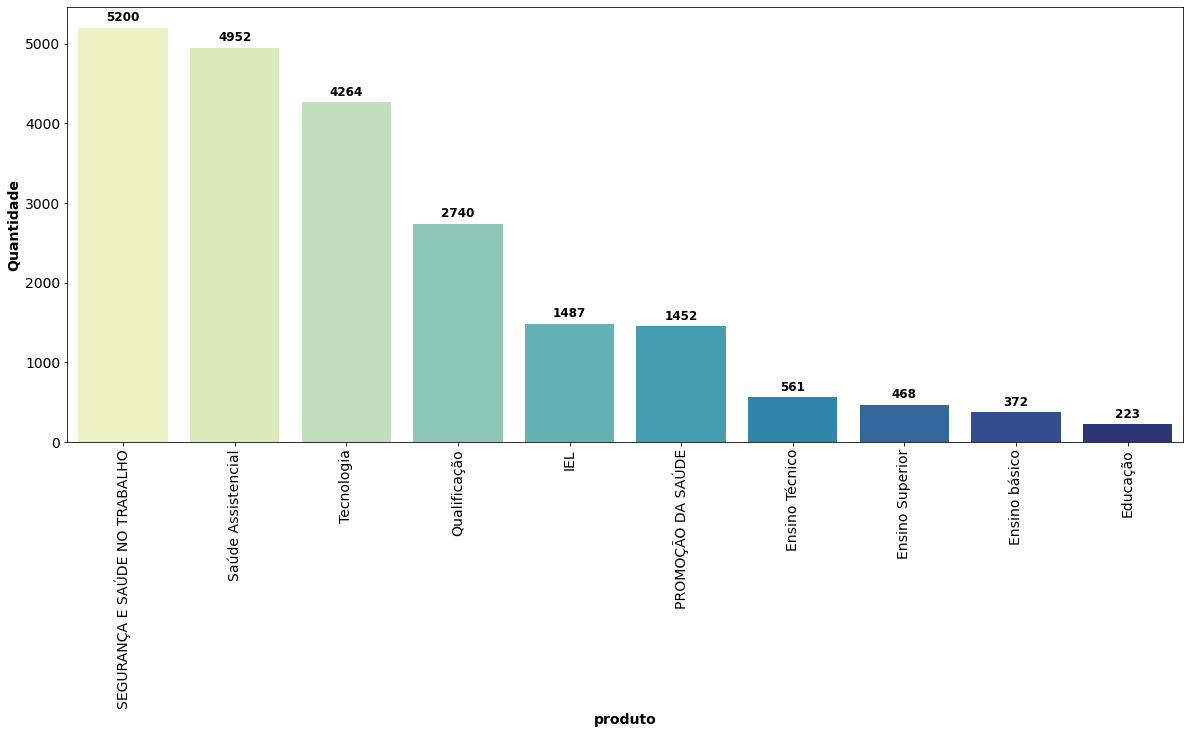

In [22]:
#volume por produto
fig, ax = plt.subplots(figsize=(20, 8))

# Contagem dos valores e ordem decrescente
order = dataframe_fiesc['produto'].value_counts().index

# Plotando o gráfico
sns.countplot(data=dataframe_fiesc, x='produto', palette='YlGnBu', order=order)

# Aumentando a fonte dos rótulos e eixos
ax.set_xlabel('produto', fontsize=14, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, fontweight='bold')

plt.show()

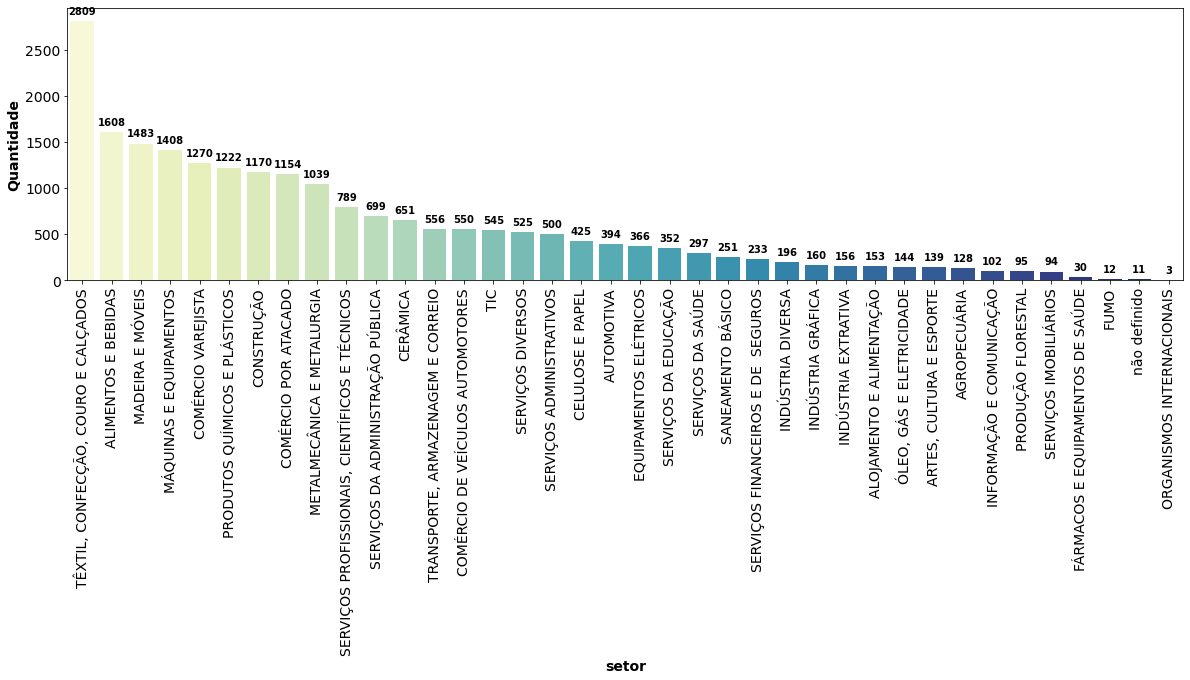

In [27]:
#volume por setor
fig, ax = plt.subplots(figsize=(20, 5))

# Contagem dos valores e ordem decrescente
order = dataframe_fiesc['setor'].value_counts().index

# Plotando o gráfico
sns.countplot(data=dataframe_fiesc, x='setor', palette='YlGnBu', order=order)

# Aumentando a fonte dos rótulos e eixos
ax.set_xlabel('setor', fontsize=14, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')

plt.show()

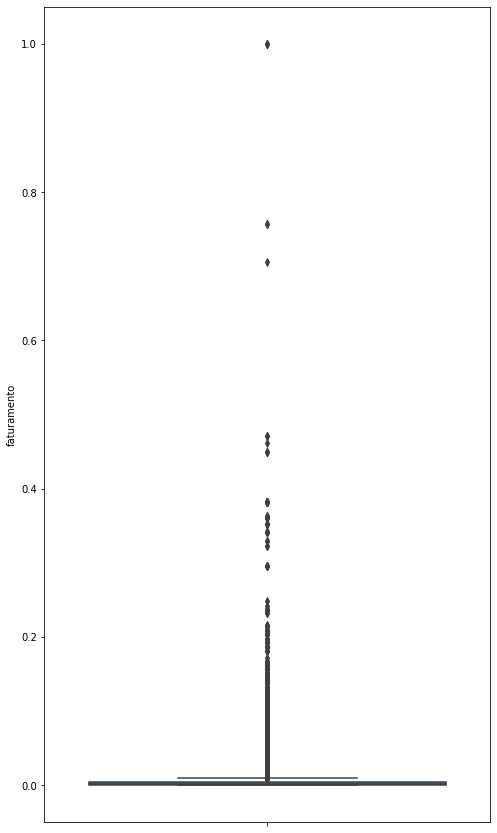

In [26]:
#boxplot faturamento
fig, ax = plt.subplots(figsize=(8,15))
sns.boxplot(y = dataframe_fiesc['faturamento'])
#plt.title('Quantidades de clientes por porte', fontsize=12, fontweight='bold')
plt.show()

In [41]:
dataframe_fiesc['faturamento'].describe()

count    2.171900e+04
mean     1.083009e+04
std      4.519203e+04
min      0.000000e+00
25%      7.015000e+02
50%      2.194000e+03
75%      6.477500e+03
max      1.662648e+06
Name: faturamento, dtype: float64

C:\Users\DEISE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


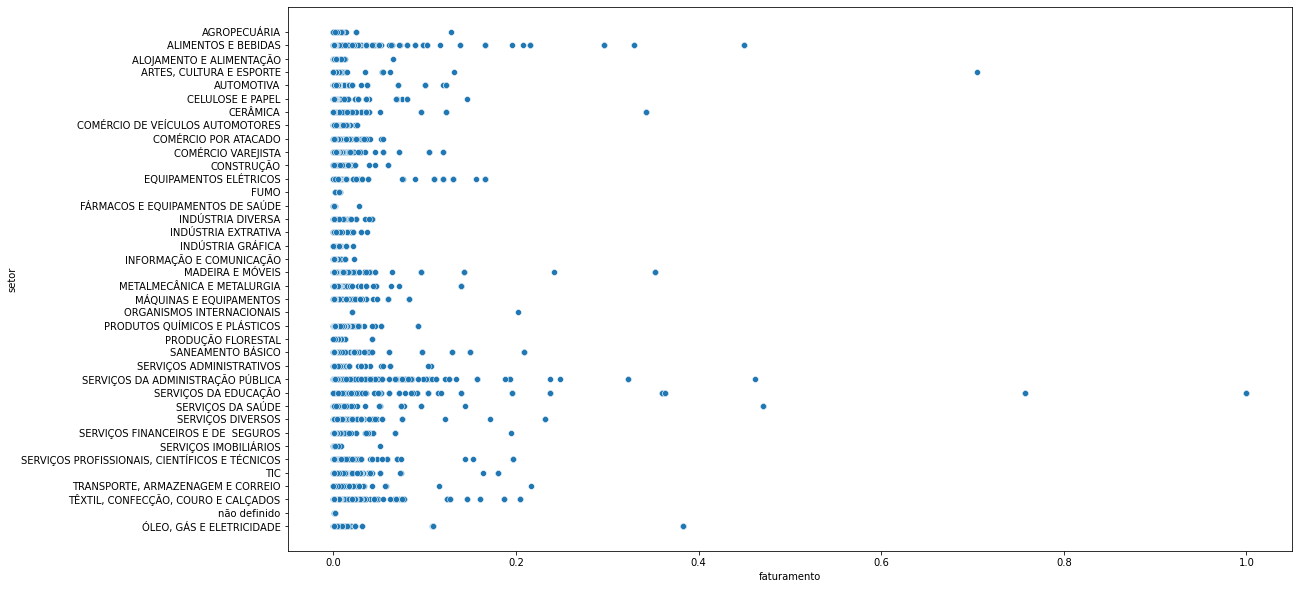

In [21]:
#dispersão faturamento e setor
fig, ax = plt.subplots(figsize=(18,10))
sns.scatterplot(dataframe_fiesc['faturamento'], dataframe_fiesc['setor'])
#plt.title('Quantidades de clientes por porte', fontsize=12, fontweight='bold')
plt.show()

C:\Users\DEISE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


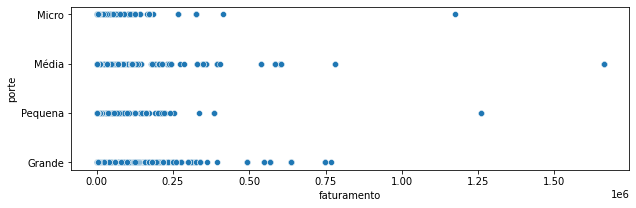

In [48]:
#dispesão faturamento e porte
fig, ax = plt.subplots(figsize=(10,3))
sns.scatterplot(dataframe_fiesc['faturamento'], dataframe_fiesc['porte'])
#plt.title('Quantidades de clientes por porte', fontsize=12, fontweight='bold')
plt.show()

In [28]:
#trandformando as variáveis categoricas de object para category
cat_vars = ['produto', 'porte', 'setor']

dataframe_fiesc = dataframe_fiesc.assign(**{col: dataframe_fiesc[col].astype('category') for col in cat_vars})

In [29]:
dataframe_fiesc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21719 entries, 0 to 21718
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   produto      21719 non-null  category
 1   porte        21719 non-null  category
 2   setor        21719 non-null  category
 3   faturamento  21719 non-null  int64   
dtypes: category(3), int64(1)
memory usage: 235.3 KB


In [30]:
#padronizar a escala de dados numéricos
num_vars = ['faturamento']

scaler = MinMaxScaler()
dataframe_fiesc[num_vars] = scaler.fit_transform(dataframe_fiesc[num_vars].values)

# 2 - Modelagem - k-prototypes

In [32]:
# identificar a posição das colunas categóricas
[i for i, col in enumerate(dataframe_fiesc.columns) if dataframe_fiesc[col].dtype == 'category']

[0, 1, 2]

In [33]:
cat_cols = [0, 1, 2]

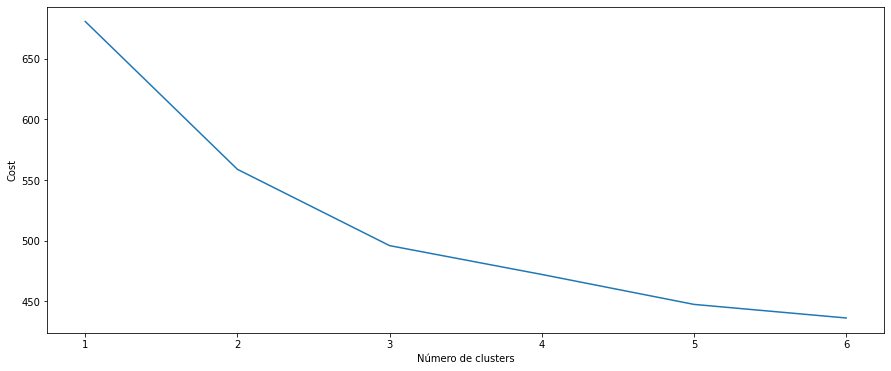

In [65]:
#Encontrar o número "ideal" de clusters
cost = []
n_clusters = []
ticks = list(range(1,7))

for num_clusters in list(range(1,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', n_jobs = 4, random_state=42)
    kproto.fit_predict(dataframe_fiesc, categorical=cat_cols)
    cost.append(kproto.cost_)
    n_clusters.append(num_clusters)

plt.figure(figsize=(15,6))
plt.plot(n_clusters, cost)
plt.xticks(ticks)
plt.xlabel('Número de clusters')
plt.ylabel('Cost')
plt.show()

In [34]:
# Rodar a clusterização com o número de clusters escolhido
kproto = KPrototypes(n_clusters=3, init='Huang', n_jobs = 4, random_state=42)
cluster_pred = kproto.fit_predict(dataframe_fiesc, categorical=cat_cols)

In [35]:
cluster_pred

array([2, 1, 0, ..., 0, 0, 0], dtype=uint16)

In [72]:
# Cria uma cópia da tabela e adiciona a coluna de cluster
final = dataframe_fiesc.copy()
final['cluster'] = cluster_pred

In [73]:
final

,produto,porte,setor,faturamento,cluster
0,IEL,Micro,INDÚSTRIA GRÁFICA,0.005807,2
1,IEL,Média,ALIMENTOS E BEBIDAS,0.000315,1
2,IEL,Pequena,ALIMENTOS E BEBIDAS,0.000271,0
3,IEL,Pequena,SERVIÇOS FINANCEIROS E DE SEGUROS,0.043164,0
4,IEL,Micro,"ARTES, CULTURA E ESPORTE",0.000180,2
...,...,...,...,...,...
21714,Saúde Assistencial,Pequena,SANEAMENTO BÁSICO,0.000430,0
21715,SEGURANÇA E SAÚDE NO TRABALHO,Pequena,SANEAMENTO BÁSICO,0.000430,0
21716,PROMOÇÃO DA SAÚDE,Pequena,SANEAMENTO BÁSICO,0.000359,0
21717,Saúde Assistencial,Pequena,SANEAMENTO BÁSICO,0.000359,0


In [130]:
# Reverte os valores que foram transformados com MinMax para os valores originais
num_vars = ['faturamento']
final[num_vars] = scaler.inverse_transform(final[num_vars].values)

In [131]:
# definir rótulos novos para os clusters - o que era 0 vira 1, e 1 vira 2
labels = {0: "Primeiro", 1: "Segundo", 2: "Terceiro"}
final['cluster'] = final['cluster'].map(labels)

In [80]:
# explorar as variáveis agrupadas por cluster para descrever os clusters
print(final.groupby('cluster').agg({'produto': 'value_counts'}))
print(final.groupby('cluster').agg({'porte': 'value_counts'}))
print(final.groupby('cluster').agg({'setor': 'value_counts'}))
print(final.groupby('cluster').agg({'faturamento': 'median'}))

                                        produto
cluster  produto                               
Primeiro Saúde Assistencial                4612
         Tecnologia                        1418
         SEGURANÇA E SAÚDE NO TRABALHO     1366
         Qualificação                      1213
         PROMOÇÃO DA SAÚDE                  665
         IEL                                475
         Ensino Técnico                     242
         Ensino Superior                    180
         Ensino básico                      142
         Educação                            88
Segundo  Tecnologia                        1761
         Qualificação                       850
         PROMOÇÃO DA SAÚDE                  501
         IEL                                364
         SEGURANÇA E SAÚDE NO TRABALHO      227
         Ensino Técnico                     210
         Ensino Superior                    204
         Ensino básico                      159
         Saúde Assistencial             

# 3- Interpretação dos resultados

In [44]:
import  plotly.express  as  px 
import matplotlib.pyplot as plt
cores_hex = ['#081d58', '#253494', '#225ea8', '#1d91c0', '#41b6c4', '#7fcdbb', '#c7e9b4', '#edf8b1', '#ffffd9', '#ffffd9']

In [81]:
#total de cada cluster
df_total = final['cluster'].value_counts()
df_total

cluster
Primeiro    10401
Terceiro     6808
Segundo      4510
Name: count, dtype: int64

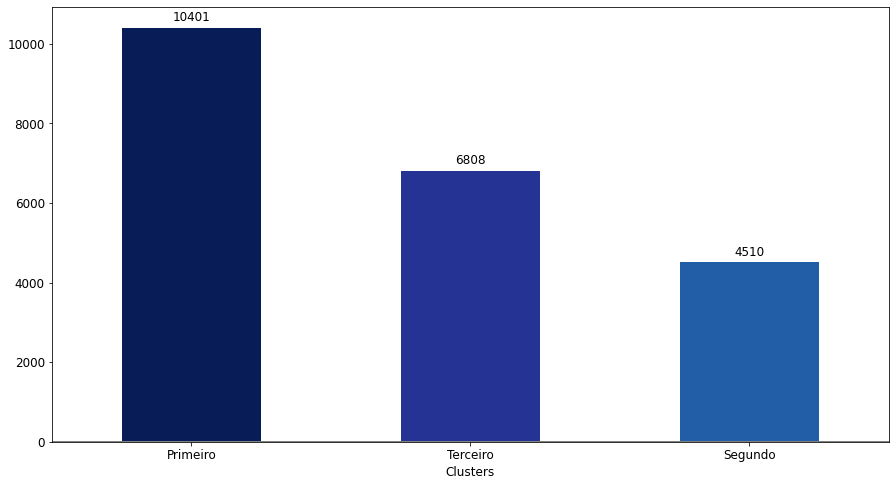

In [82]:
ax = df_total.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')
plt.show()

In [160]:
# Cria uma cópia da tabela Dummy e adiciona a coluna de cluster
final_d = df_dummies.copy().astype(int)
final_d['cluster'] = cluster_pred
labels = {0: "Primeiro", 1: "Segundo", 2: "Terceiro"}
final_d['cluster'] = final_d['cluster'].map(labels)

In [161]:
final_d

,faturamento,produto_Educação,produto_Ensino Superior,produto_Ensino Técnico,produto_Ensino básico,produto_IEL,produto_PROMOÇÃO DA SAÚDE,produto_Qualificação,produto_SEGURANÇA E SAÚDE NO TRABALHO,produto_Saúde Assistencial,...,setor_SERVIÇOS DIVERSOS,setor_SERVIÇOS FINANCEIROS E DE SEGUROS,setor_SERVIÇOS IMOBILIÁRIOS,"setor_SERVIÇOS PROFISSIONAIS, CIENTÍFICOS E TÉCNICOS",setor_TIC,"setor_TRANSPORTE, ARMAZENAGEM E CORREIO","setor_TÊXTIL, CONFECÇÃO, COURO E CALÇADOS",setor_não definido,"setor_ÓLEO, GÁS E ELETRICIDADE",cluster
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Terceiro
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Segundo
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Primeiro
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Primeiro
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Terceiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21714,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Primeiro
21715,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Primeiro
21716,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Primeiro
21717,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Primeiro


In [97]:
#media geral
df_media = final_d.groupby('cluster').mean()
df_media

,faturamento,produto_Educação,produto_Ensino Superior,produto_Ensino Técnico,produto_Ensino básico,produto_IEL,produto_PROMOÇÃO DA SAÚDE,produto_Qualificação,produto_SEGURANÇA E SAÚDE NO TRABALHO,produto_Saúde Assistencial,...,setor_SERVIÇOS DA SAÚDE,setor_SERVIÇOS DIVERSOS,setor_SERVIÇOS FINANCEIROS E DE SEGUROS,setor_SERVIÇOS IMOBILIÁRIOS,"setor_SERVIÇOS PROFISSIONAIS, CIENTÍFICOS E TÉCNICOS",setor_TIC,"setor_TRANSPORTE, ARMAZENAGEM E CORREIO","setor_TÊXTIL, CONFECÇÃO, COURO E CALÇADOS",setor_não definido,"setor_ÓLEO, GÁS E ELETRICIDADE"
cluster,,,,,,,,,,,,,,,,,,,,,
Primeiro,0.000000,0.008461,0.017306,0.023267,0.013653,0.045669,0.063936,0.116623,0.131334,0.443419,...,0.007499,0.014806,0.013268,0.004423,0.028651,0.026824,0.021921,0.163542,0.000385,0.007211
Segundo,0.000665,0.021729,0.045233,0.046563,0.035255,0.080710,0.111086,0.188470,0.050333,0.030155,...,0.009534,0.019069,0.005100,0.000222,0.018182,0.018625,0.012639,0.230820,0.000443,0.008647
Terceiro,0.000000,0.005435,0.012338,0.016011,0.010429,0.095182,0.042009,0.099442,0.529818,0.029965,...,0.025852,0.041863,0.010576,0.006904,0.060076,0.026733,0.039806,0.009841,0.000734,0.004407


# Porte por Cluster

In [98]:
df_porte = final_d.groupby('cluster').mean().filter(like='porte')
df_porte_percentual = df_porte.div(df_porte.sum(axis=1), axis=0) * 100
df_porte_percentual = df_porte_percentual.round(2)

df_porte_percentual

,porte_Grande,porte_Micro,porte_Média,porte_Pequena
cluster,,,,
Primeiro,6.50,13.04,7.75,72.71
Segundo,17.54,6.08,73.17,3.22
Terceiro,7.02,76.79,8.40,7.78


In [99]:
df_porte_percentual_1 = df_porte_percentual.iloc[[0]].copy()
df_porte_percentual_sorted_1 = df_porte_percentual_1.T.sort_values(by='Primeiro', ascending=False).T

df_porte_percentual_2 = df_porte_percentual.iloc[[1]].copy()
df_porte_percentual_sorted_2 = df_porte_percentual_2.T.sort_values(by='Segundo', ascending=False).T

df_porte_percentual_3 = df_porte_percentual.iloc[[2]].copy()
df_porte_percentual_sorted_3 = df_porte_percentual_3.T.sort_values(by='Terceiro', ascending=False).T

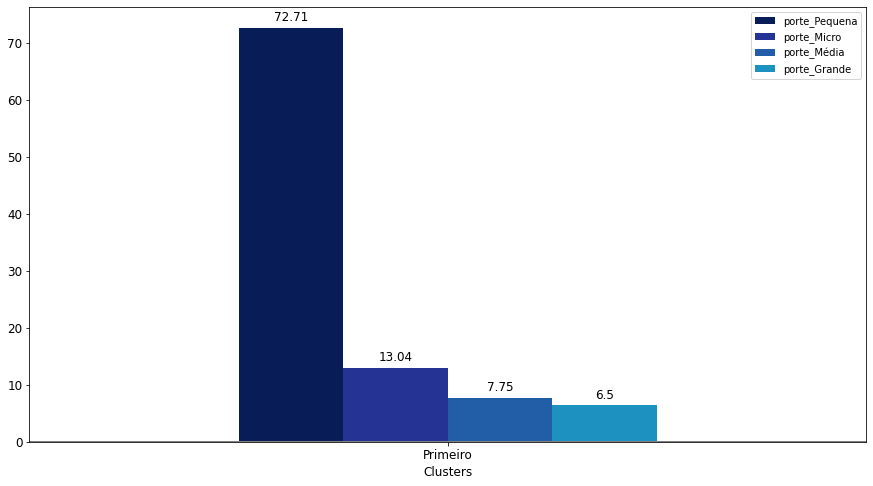

In [164]:
ax = df_porte_percentual_sorted_1.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

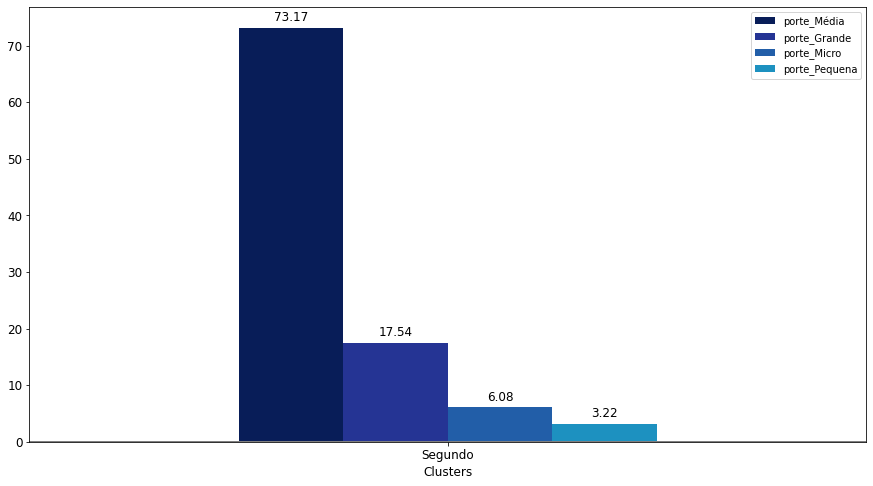

In [103]:
ax = df_porte_percentual_sorted_2.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

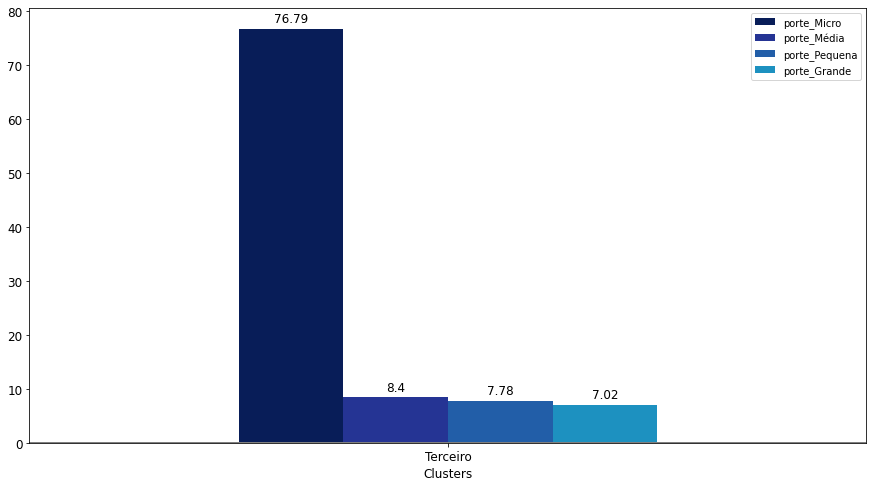

In [104]:
ax = df_porte_percentual_sorted_3.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

# Produto por Cluster

In [106]:
df_produto = final_d.groupby('cluster').mean().filter(like='produto')
df_produto_percentual = df_produto.div(df_produto.sum(axis=1), axis=0) * 100
df_produto_percentual = df_produto_percentual.round(2)
df_produto_percentual

,produto_Educação,produto_Ensino Superior,produto_Ensino Técnico,produto_Ensino básico,produto_IEL,produto_PROMOÇÃO DA SAÚDE,produto_Qualificação,produto_SEGURANÇA E SAÚDE NO TRABALHO,produto_Saúde Assistencial,produto_Tecnologia
cluster,,,,,,,,,,
Primeiro,0.85,1.73,2.33,1.37,4.57,6.39,11.66,13.13,44.34,13.63
Segundo,2.17,4.52,4.66,3.53,8.07,11.11,18.85,5.03,3.02,39.05
Terceiro,0.54,1.23,1.60,1.04,9.52,4.20,9.94,52.98,3.00,15.94


In [107]:
df_produto_percentual_1 = df_produto_percentual.iloc[[0]].copy()
df_produto_percentual_sorted_1 = df_produto_percentual_1.T.sort_values(by='Primeiro', ascending=False).T

df_produto_percentual_2 = df_produto_percentual.iloc[[1]].copy()
df_produto_percentual_sorted_2 = df_produto_percentual_2.T.sort_values(by='Segundo', ascending=False).T

df_produto_percentual_3 = df_produto_percentual.iloc[[2]].copy()
df_produto_percentual_sorted_3 = df_produto_percentual_3.T.sort_values(by='Terceiro', ascending=False).T

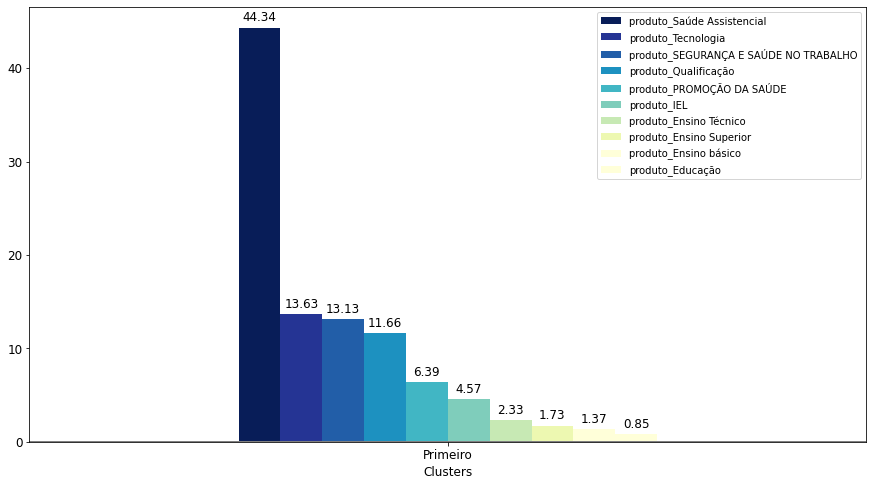

In [110]:
ax = df_produto_percentual_sorted_1.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

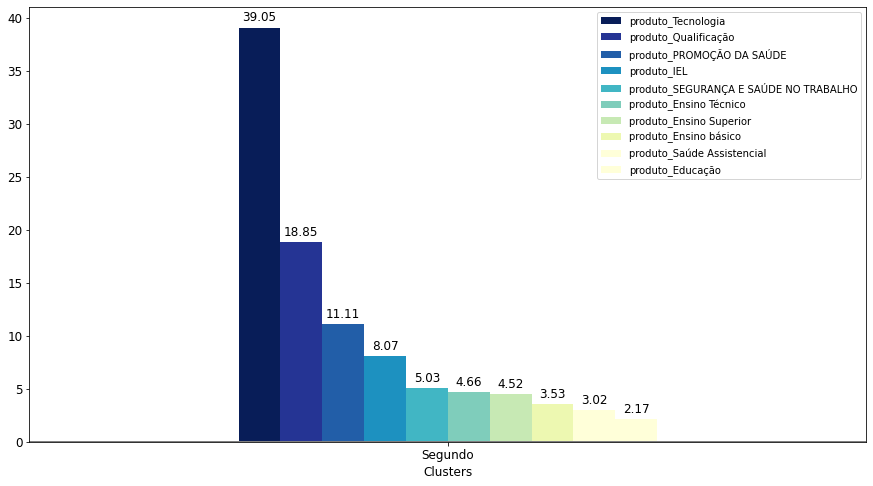

In [112]:
ax = df_produto_percentual_sorted_2.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

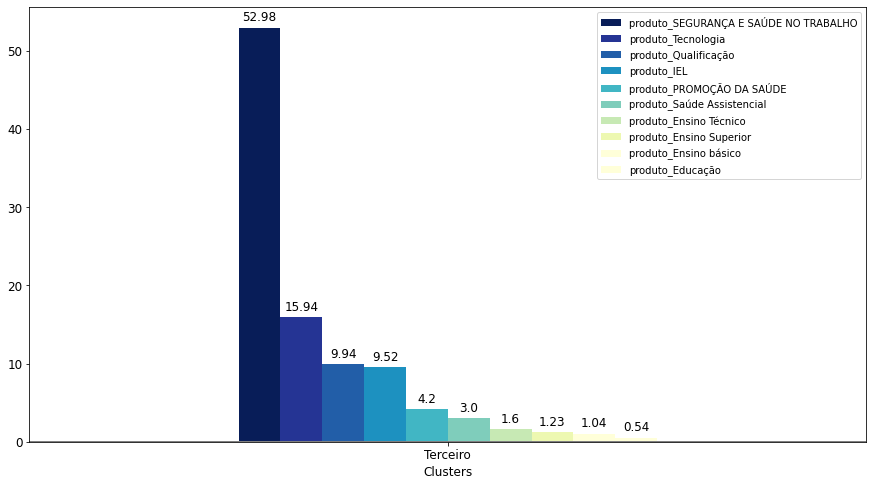

In [114]:
ax = df_produto_percentual_sorted_3.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

# Setor por Cluster (5+)

In [116]:
df_setor = final_d.groupby('cluster').sum().filter(like='setor')
df_setor_percentual = df_setor.div(df_setor.sum(axis=1), axis=0) * 100
df_setor_percentual = df_setor_percentual.round(2)
df_setor_percentual

,setor_AGROPECUÁRIA,setor_ALIMENTOS E BEBIDAS,setor_ALOJAMENTO E ALIMENTAÇÃO,"setor_ARTES, CULTURA E ESPORTE",setor_AUTOMOTIVA,setor_CELULOSE E PAPEL,setor_CERÂMICA,setor_COMÉRCIO DE VEÍCULOS AUTOMOTORES,setor_COMÉRCIO POR ATACADO,setor_COMÉRCIO VAREJISTA,...,setor_SERVIÇOS DA SAÚDE,setor_SERVIÇOS DIVERSOS,setor_SERVIÇOS FINANCEIROS E DE SEGUROS,setor_SERVIÇOS IMOBILIÁRIOS,"setor_SERVIÇOS PROFISSIONAIS, CIENTÍFICOS E TÉCNICOS",setor_TIC,"setor_TRANSPORTE, ARMAZENAGEM E CORREIO","setor_TÊXTIL, CONFECÇÃO, COURO E CALÇADOS",setor_não definido,"setor_ÓLEO, GÁS E ELETRICIDADE"
cluster,,,,,,,,,,,,,,,,,,,,,
Primeiro,0.63,7.08,0.48,0.36,1.69,2.08,3.32,2.92,5.18,2.45,...,0.75,1.48,1.33,0.44,2.87,2.68,2.19,16.35,0.04,0.72
Segundo,0.29,11.24,0.16,0.11,2.77,2.88,3.15,0.31,2.48,0.75,...,0.95,1.91,0.51,0.02,1.82,1.86,1.26,23.08,0.04,0.86
Terceiro,0.72,5.36,1.41,1.42,1.37,1.16,2.41,3.41,7.39,14.41,...,2.59,4.19,1.06,0.69,6.01,2.67,3.98,0.98,0.07,0.44


In [117]:
df_setor_percentual_1 = df_setor_percentual.iloc[[0]].copy()
df_setor_percentual_sorted_1 = df_setor_percentual_1.T.sort_values(by='Primeiro', ascending=False).T

df_setor_percentual_2 = df_setor_percentual.iloc[[1]].copy()
df_setor_percentual_sorted_2 = df_setor_percentual_2.T.sort_values(by='Segundo', ascending=False).T

df_setor_percentual_3 = df_setor_percentual.iloc[[2]].copy()
df_setor_percentual_sorted_3 = df_setor_percentual_3.T.sort_values(by='Terceiro', ascending=False).T

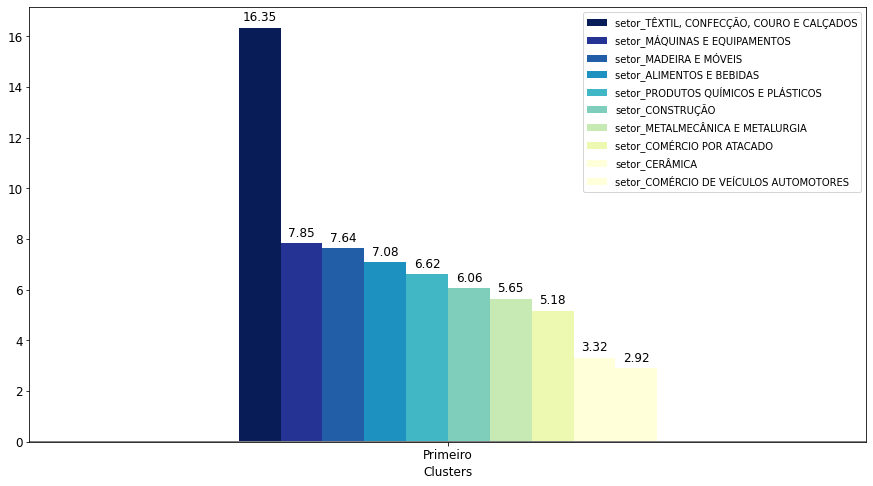

In [165]:
df_1_top_5 = df_setor_percentual_sorted_1.iloc[:, :10]  # Seleciona as cinco primeiras colunas

ax = df_1_top_5.plot(kind='bar', figsize=(15, 8), color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')

plt.show()

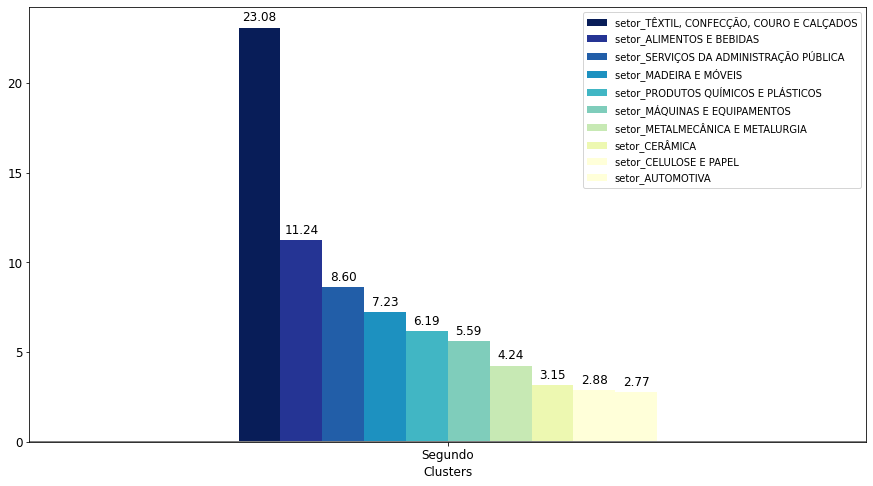

In [166]:
df_2_top_5 = df_setor_percentual_sorted_2.iloc[:, :10]  # Seleciona as cinco primeiras colunas

ax = df_2_top_5.plot(kind='bar', figsize=(15, 8), color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')

plt.show()

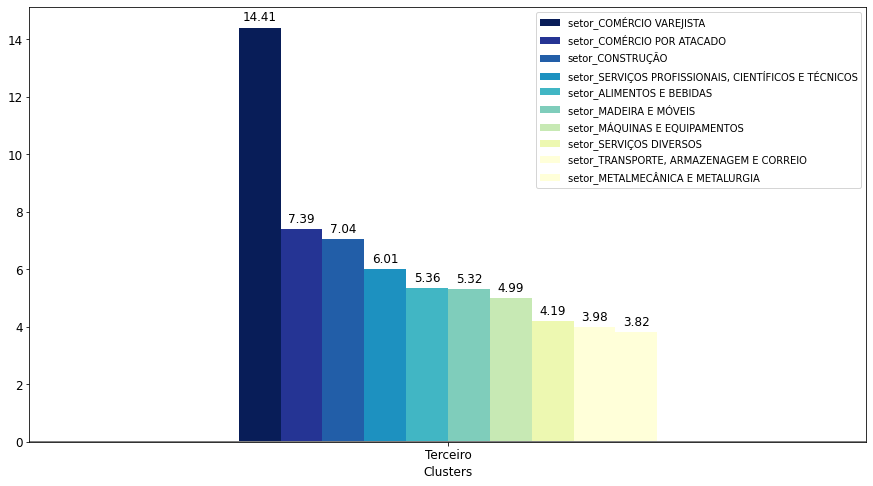

In [167]:
df_3_top_5 = df_setor_percentual_sorted_3.iloc[:, :10]  # Seleciona as cinco primeiras colunas

ax = df_3_top_5.plot(kind='bar', figsize=(15, 8), color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')

plt.show()

# Faturamento por Cluster

In [147]:
final_fat['cluster'] = final_fat['cluster'].astype('category')

In [154]:
final_fat.groupby('cluster')[['faturamento']].mean()

,faturamento
cluster,
Primeiro,4810.443034
Segundo,29597.509978
Terceiro,7594.095035


In [157]:
final_fat.groupby('cluster')[['faturamento']].median()

,faturamento
cluster,
Primeiro,1646.0
Segundo,6022.5
Terceiro,2250.0


In [137]:
#Dataframe final com os clusters
final_fat = dataframe_fiesc.copy()
final_fat['cluster'] = cluster_pred

In [139]:
num_vars = ['faturamento']
final_fat[num_vars] = scaler.inverse_transform(final_fat[num_vars].values)

In [143]:
labels = {0: "Primeiro", 1: "Segundo", 2: "Terceiro"}
final_fat['cluster'] = final_fat['cluster'].map(labels)

In [144]:
final_fat

,produto,porte,setor,faturamento,cluster
0,IEL,Micro,INDÚSTRIA GRÁFICA,9655.0,Terceiro
1,IEL,Média,ALIMENTOS E BEBIDAS,523.0,Segundo
2,IEL,Pequena,ALIMENTOS E BEBIDAS,450.0,Primeiro
3,IEL,Pequena,SERVIÇOS FINANCEIROS E DE SEGUROS,71766.0,Primeiro
4,IEL,Micro,"ARTES, CULTURA E ESPORTE",300.0,Terceiro
...,...,...,...,...,...
21714,Saúde Assistencial,Pequena,SANEAMENTO BÁSICO,715.0,Primeiro
21715,SEGURANÇA E SAÚDE NO TRABALHO,Pequena,SANEAMENTO BÁSICO,715.0,Primeiro
21716,PROMOÇÃO DA SAÚDE,Pequena,SANEAMENTO BÁSICO,597.0,Primeiro
21717,Saúde Assistencial,Pequena,SANEAMENTO BÁSICO,597.0,Primeiro


# Primeiro Cluster:

47% dos clientes

porte: pequenas
(72,71%)

produto: saúde assistencial (44,34%)
tecnologia
(13,63%)
qualificação
(11,66%)

setor: indústria da transformação 
(têxtil 16,35%)

faturamento (média/mediana) 4.810/1.646



## Segundo Cluster:

20% dos clientes

porte: médio
(73,17%)
grandes
(17,54%) 

produto: tecnologia 
(39,05%)
qualificação
(18,85%)
promoção saúde
(11,11%)

setor: indústria da transformação
(têxtil 23%)

faturamento (média/mediana): 29.597/6.022



## Terceiro Cluster:

31% dos clientes

porte: micro
(76,79%)

produto: sst
(52,98%)
tecnologia
(15,94%)

setor: Comércio e serviços (40%)
indústria transf. diversa

faturamento (média/mediana):7.594/2.250



